Dataset Source

In [1]:
#Kaggle Dataset - https://www.kaggle.com/code/eduardod/student-exam-performance-prediction

In [2]:
#Import Python Packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
#Import data
df = pd.read_csv('student_exam_data.csv')

In [4]:
#Read the head of the dataset
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
#Data cleaning - Check for null values
df.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [6]:
#Describe the dataset
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [7]:
#Function outputs mean and median values from specified df columns
def stat_outputs(df):
    for i in df:
        n = df[i].name
        m = round(df[i].mean(),2)
        md = round(df[i].median(),2)
        print(n + " Mean: {}".format(m))
        print(n + " Median: {}".format(md))

In [8]:
stat_outputs(df[['Study Hours', 'Previous Exam Score']])

Study Hours Mean: 5.49
Study Hours Median: 5.62
Previous Exam Score Mean: 68.92
Previous Exam Score Median: 68.31


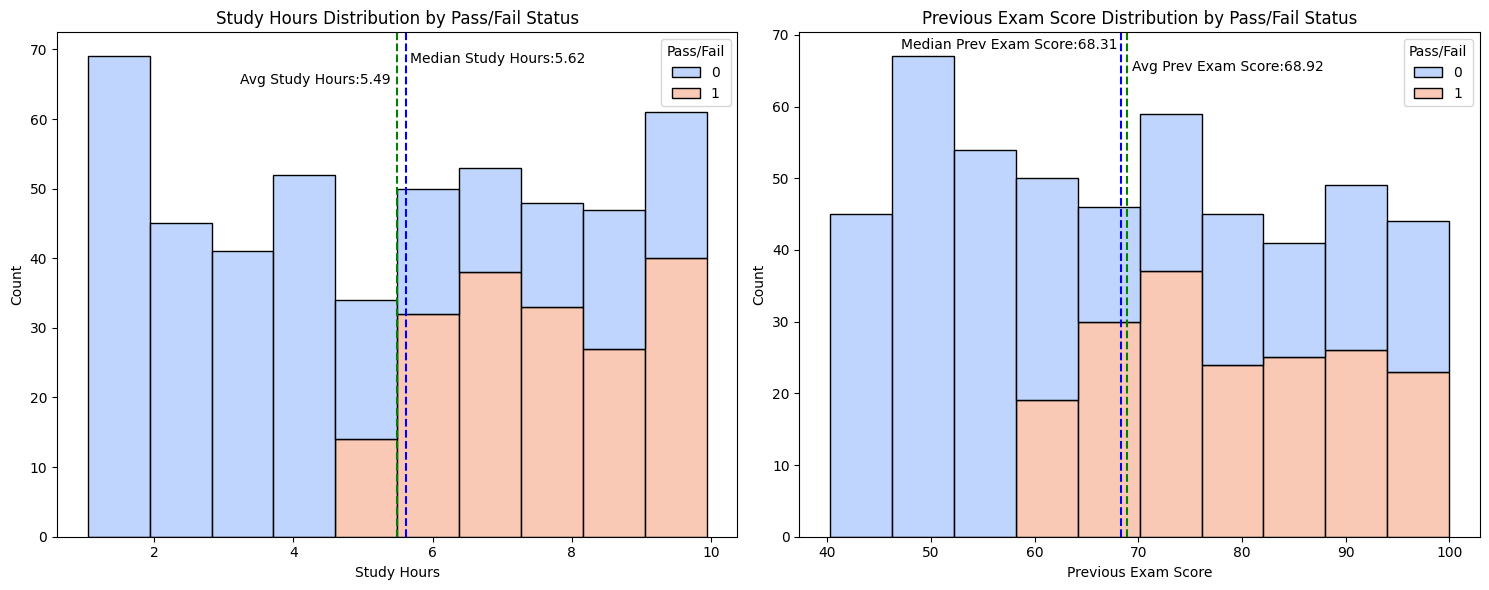

In [9]:
#Visualize the data via a stacked bar chart to view students that passed versus failed the exam.
#Given that the medianand mean are close together shows the data is normally distributed. 

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Study Hours', hue='Pass/Fail',  multiple="stack", palette="coolwarm")
plt.title('Study Hours Distribution by Pass/Fail Status')
plt.axvline(x = df['Study Hours'].mean(), color = 'g', ls = '--')
plt.text(df['Study Hours'].mean()-2.25,65,'Avg Study Hours:{}'.format(round(df['Study Hours'].mean(),2)))
plt.axvline(x = df['Study Hours'].median(), color = 'b', ls = '--')
plt.text(df['Study Hours'].median() +.05,68,'Median Study Hours:{}'.format(round(df['Study Hours'].median(),2)))

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Previous Exam Score', hue='Pass/Fail', multiple="stack", palette="coolwarm")
plt.title('Previous Exam Score Distribution by Pass/Fail Status')
plt.axvline(x = df['Previous Exam Score'].mean(), color = 'g', ls = '--')
plt.text(df['Previous Exam Score'].mean()+.5,65,'Avg Prev Exam Score:{}'.format(round(df['Previous Exam Score'].mean(),2)))
plt.axvline(x = df['Previous Exam Score'].median(), color = 'b', ls = '--')
plt.text(df['Previous Exam Score'].median()-21.25,68,'Median Prev Exam Score:{}'.format(round(df['Previous Exam Score'].median(),2)))

plt.tight_layout()
plt.show()

In [10]:
#Pearson Correlation Test 
#There is a weak correlation between the two key features. Which indicates a small relationship between variables on a linear scale.
#The scatter (below) also shows how varied the data set
correlation = df['Study Hours'].corr(df['Previous Exam Score'], method = 'pearson')
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: 0.010354204028283442


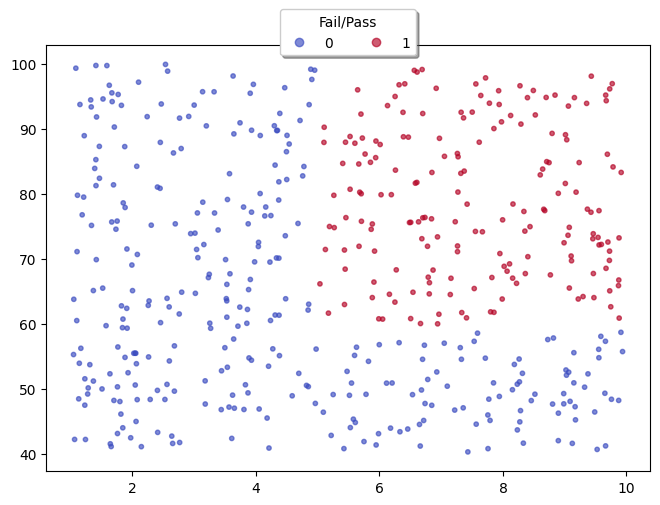

In [11]:
x = df['Study Hours']
y = df['Previous Exam Score'] #0 = Fail, 1 = Pass

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=df['Pass/Fail'], s = 10, alpha = 0.65, label=df['Pass/Fail'])

#add fill betweens and only plot the dotted lines passed the means
sc.set_cmap('coolwarm')
ax.legend(*sc.legend_elements(), loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=2, fancybox=True, shadow=True, title = "Fail/Pass")
plt.tight_layout(pad=0)
plt.show();

In [12]:
#How many passed versus how many failed of the entire population?
students = len(df)
f = len(df[df['Pass/Fail'] == 0] == True)
p = len(df[df['Pass/Fail'] == 1] == True)

print("Percentage Passed: {:.2f}%".format((p/students)*100))
print("Number Passed: {}".format(p))

print("Percentage Failed: {:.2f}%".format((f/students)*100))
print("Number Failed: {}".format(f))

Percentage Passed: 36.80%
Number Passed: 184
Percentage Failed: 63.20%
Number Failed: 316


In [14]:
#How many passed versus failed when hours studied were greater than the mean?
students = len(df[df['Study Hours'] >= df['Study Hours'].mean()])
f = len(df[(df['Pass/Fail'] == 0) & (df['Study Hours'] >= df['Study Hours'].mean())] == True)
p = len(df[(df['Pass/Fail'] == 1) & (df['Study Hours'] >= df['Study Hours'].mean())] == True)

print("Total Passed: {:.2f}%".format((p/students)*100))
print("Total Failed: {:.2f}%".format((f/students)*100))

Total Passed: 65.64%
Total Failed: 34.36%


In [16]:
#How many passed versus failed when their previous exam score was greater than the mean?
students = len(df[df['Previous Exam Score'] >= df['Previous Exam Score'].mean()])
f = len(df[(df['Pass/Fail'] == 0) & (df['Previous Exam Score'] >= df['Previous Exam Score'].mean())] == True)
p = len(df[(df['Pass/Fail'] == 1) & (df['Previous Exam Score'] >= df['Previous Exam Score'].mean())] == True)

print("Total Passed: {:.2f}%".format((p/students)*100))
print("Total Failed: {:.2f}%".format((f/students)*100))
#Initial observation: 
## 1) Hours studied appears to be a slightly better predictor of whether they will pass or fail the exam
## 2) Previous exam scores appears to be a slightly worse predictor of whether a student will pass or fail the exam
## What if a student studied >= to the mean AND previous >= to the mean?

Total Passed: 56.10%
Total Failed: 43.90%


In [18]:
#How many passed versus failed when their previous exam score was greater than or equal to the mean and their study hours where greater than or equal to the mean?
students = len(df[(df['Previous Exam Score'] >= df['Previous Exam Score'].mean()) & (df['Study Hours'] >= df['Study Hours'].mean())] == True)
f = len(df[(df['Pass/Fail'] == 0) & (df['Previous Exam Score'] >= df['Previous Exam Score'].mean()) & (df['Study Hours'] >= df['Study Hours'].mean())] == True)
p = len(df[(df['Pass/Fail'] == 1) & (df['Previous Exam Score'] >= df['Previous Exam Score'].mean()) & (df['Study Hours'] >= df['Study Hours'].mean())] == True)

print("Total Passed: {:.2f}%".format((p/students)*100))
print("Total Failed: {:.2f}%".format((f/students)*100))
#100% of the students who studied at least 5.49 hours and recieved a previous score of at least 68.92 passed the test.

Total Passed: 100.00%
Total Failed: 0.00%


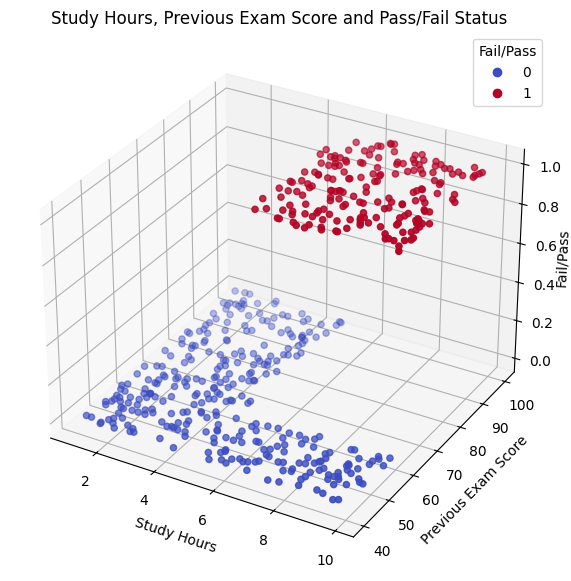

In [19]:
#Visualize the dispersion via 3d chart
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Study Hours'], df['Previous Exam Score'], df['Pass/Fail'],
                     c=df['Pass/Fail'], cmap='coolwarm', marker='o')

ax.set_xlabel('Study Hours')
ax.set_ylabel('Previous Exam Score')
ax.set_zlabel('Fail/Pass', rotation = 90, labelpad=-2)
ax.set_title('Study Hours, Previous Exam Score and Pass/Fail Status')

ax.legend(*scatter.legend_elements(), title="Fail/Pass")


plt.show()

In [23]:
#Develop a predictive model based on these two features via Logistic Regression.

#Isolate the X values as inputs
X = df.values[:, :-1]
#Isolate the Y values as outputs
Y = df.values[:, -1]

#Build the model - train and test - then fit
model = LogisticRegression(solver='liblinear') #What are these solvers?
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .6, random_state = 10)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

#Generate the coeeficients and Intercept for analysis
coef = model.coef_.flatten()
print("COEFFICIENTS: {0}".format(coef))
#Generate the intercept
int = model.intercept_.flatten()
print("INTERCEPT: {0}".format(int))

#print each coefficient for each feature (input)
print("Study Hours:{0}".format(coef[0]))
print("Previous Exam Score: {0}".format(coef[1]))



COEFFICIENTS: [0.44959187 0.0330464 ]
INTERCEPT: [-5.16621955]
Study Hours:0.44959186651523825
Previous Exam Score: 0.03304639909471087


In [24]:
def matrix_breakout(matrix):
    TP = matrix[0][0] #True Positive
    FN = matrix[0][1] #False Negative
    FP = matrix[1][0] #False Positive
    TN = matrix[1][1] #True Negative

    accuracy = (TP+TN) / (TP+TN+FP+FN)
    print("Accuracy: {}%".format(round(accuracy*100,2)))
    sensitivity = TP / (TP+FN)
    print("Sensitivity: {}%".format(round(sensitivity*100,2)))
    specificity = TN / (TN+FP)
    print("Specificity: {}%".format(round(specificity*100,2)))
    precision = TP / (TP + FP)
    print("Precision: {}%".format(round(precision*100,2)))
    negative_predicted_value = TN / (TP+FN)
    print("Neg Predicted Value: {}%".format(round(negative_predicted_value*100,2)))

In [25]:
#Accuracy score is 86.33% - indicates the model is fairly accurate but could use additional features to tighten the model
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)

matrix_breakout(matrix)

Accuracy: 86.33%
Sensitivity: 83.76%
Specificity: 91.26%
Precision: 94.83%
Neg Predicted Value: 47.72%


In [26]:
#I will use this KNN as an additional feature set for a Logistic Regression.

#Identify predictor columns
predictors = ['Study Hours', 'Previous Exam Score']
#Identify output column
outcome = 'Pass/Fail'

#Create X, Y identifiers
X = df.loc[0:, predictors]
y = df.loc[0:, outcome]

#Build the model and fit
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

#Extract the probability of a pass to be used as the feature
#add the feature to the df
df['knn pass feature'] = knn.predict_proba(X)[:,1]

In [28]:
#restructure the dataset to ensure the output column is on outside the 
df = df[['Study Hours', 'Previous Exam Score', 'knn pass feature', 'Pass/Fail']]
df.head()

,Study Hours,Previous Exam Score,knn pass feature,Pass/Fail
0,4.370861,81.889703,0.3,0
1,9.556429,72.165782,1.0,1
2,7.587945,58.571657,0.2,0
3,6.387926,88.827701,1.0,1
4,2.404168,81.083870,0.0,0


In [31]:
#Fitting the Logistic Curve

#Isolate the X values as inputs
X = df.values[:, :-1]
#Isolate the Y values as outputs
Y = df.values[:, -1]

#Build the model - train and test - then fit
model = LogisticRegression(solver='liblinear') #What are these solvers?
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .6, random_state = 10)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

#Generate the coeeficients and Intercept for analysis
coef = model.coef_.flatten()
print("COEFFICIENTS: {0}".format(coef))
#Generate the intercept
int = model.intercept_.flatten()
print("INTERCEPT: {0}".format(int))

#print each coefficient for each feature (input)
print("Study Hours:{0}".format(coef[0]))
print("Previous Exam Score: {0}".format(coef[1]))
print("KNN Feature: {0}".format(coef[2]))

COEFFICIENTS: [ 0.10856303 -0.016374    5.52831478]
INTERCEPT: [-2.12007663]
Study Hours:0.10856303478172262
Previous Exam Score: -0.01637400419835572
KNN Feature: 5.528314775973842


In [45]:
#Accuracy score is 99.0% - By adding the knn probability as a feature, the model improved dramatically
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
matrix_breakout(matrix)

Accuracy: 99.0%
Sensitivity: 98.98%
Specificity: 99.03%
Precision: 99.49%
Neg Predicted Value: 51.78%


array([[195,   2],
       [  1, 102]], dtype=int64)

In [42]:
#To provide better metrics and outlines to visiualize the scatter, lets derive some guidelines via Decision Tree Classifier

#Isolate the X values as inputs - excluding KNN feature
X = df.values[:, :-2]
#Isolate the Y values as outputs
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .6, random_state = 10)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,Y_train)

# Validating models accuracy
output = round(model.score(X_train,Y_train)*100, 2)
print("Decision Tree Accuracy: {}%".format(output))

Decision Tree Accuracy: 100.0%


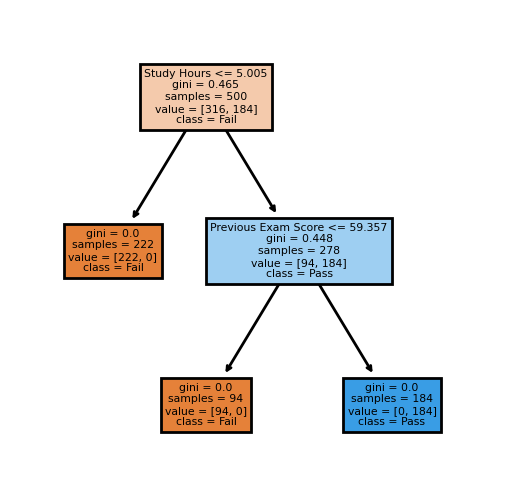

In [56]:
#
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,Y)

fn=['Study Hours', 'Previous Exam Score']
cn=["Fail","Pass"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#Decision Tree Classifer indicates students with Study Hours less than 5.01 hours or previous score less than 59.36 will predictively fail the exam
#Lets plot these parameters on the scatter to validate

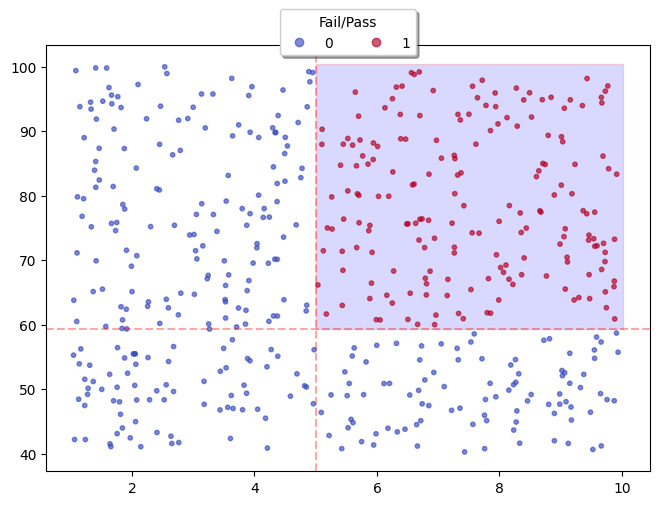

In [59]:
x = df['Study Hours']
y = df['Previous Exam Score']

fig, ax = plt.subplots()

rect = patches.Rectangle((5.01, 59.36), 5, 41, linewidth=1, edgecolor='r', facecolor='b', alpha = 0.15)
ax.add_patch(rect)

ax.axvline(x = 5.01, ls = '--', color = 'r', alpha = 0.35)
ax.axhline(y = 59.36, ls = '--', color = 'r', alpha = 0.35)

sc = ax.scatter(x, y, c=df['Pass/Fail'], s = 10, alpha = 0.65, label=df['Pass/Fail'])

sc.set_cmap('coolwarm')
ax.legend(*sc.legend_elements(), loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=2, fancybox=True, shadow=True, title = "Fail/Pass")
plt.tight_layout(pad=0)
plt.show();